<center><img src="prog_lang.jpg" width=500></center>

# Analyze the Popularity of Programming Languages

In [31]:
library(readr)
library(dplyr)
library(ggplot2)

In [32]:
data <- read_csv("stack_overflow_data.csv")

Rows: 420066 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tag
dbl (3): year, num_questions, year_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Has R been growing or shrinking over time? Analyze the number of questions tagged with R each year.

In [33]:
data_percentage <- data %>% 
	mutate(percentage = (num_questions / year_total) * 100)

In [34]:
r_over_time <- data_percentage %>%
	filter(tag == "r")

print(r_over_time)

# A tibble: 13 × 5
    year tag   num_questions year_total percentage
   <dbl> <chr>         <dbl>      <dbl>      <dbl>
 1  2008 r                 8     168541    0.00475
 2  2009 r               523     981124    0.0533 
 3  2010 r              2264    1970729    0.115  
 4  2011 r              5835    3473395    0.168  
 5  2012 r             12183    4787010    0.255  
 6  2013 r             22256    6037170    0.369  
 7  2014 r             30923    6431458    0.481  
 8  2015 r             40704    6612772    0.616  
 9  2016 r             44365    6593600    0.673  
10  2017 r             51061    6342517    0.805  
11  2018 r             52288    5621997    0.930  
12  2019 r             52249    5410632    0.966  
13  2020 r             52662    5452545    0.966  


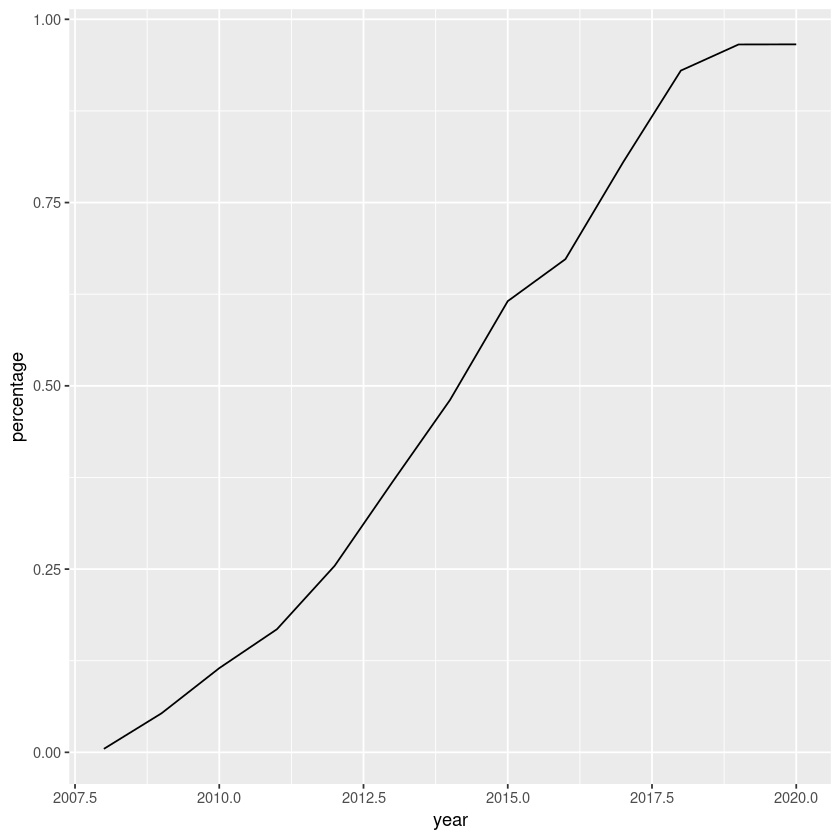

In [35]:
ggplot(r_over_time) +
	geom_line(aes(x = year, y = percentage))

### What percentage of the total number of questions asked in 2020 had the R tag?

In [36]:
R_tag_2020 <- data_percentage %>%
	filter(tag == "r", year == "2020")

In [37]:
r_selected <- R_tag_2020 %>% select(percentage)

In [38]:
r_percentage <- r_selected$percentage

### What were the five most asked-about tags between 2015 and 2020?

In [39]:
sorted_tags <- data %>%
	filter(year >= 2015) %>%
	group_by(tag) %>%
	summarize(tag_total = sum(num_questions)) %>%
	arrange(desc(tag_total))

In [40]:
highest_tags <- head(sorted_tags$tag, n = 5)

print(highest_tags)

[1] "javascript" "python"     "java"       "android"    "c#"        


In [41]:
data_subset <- data_percentage %>%
	filter(tag %in% highest_tags, year >= 2015)

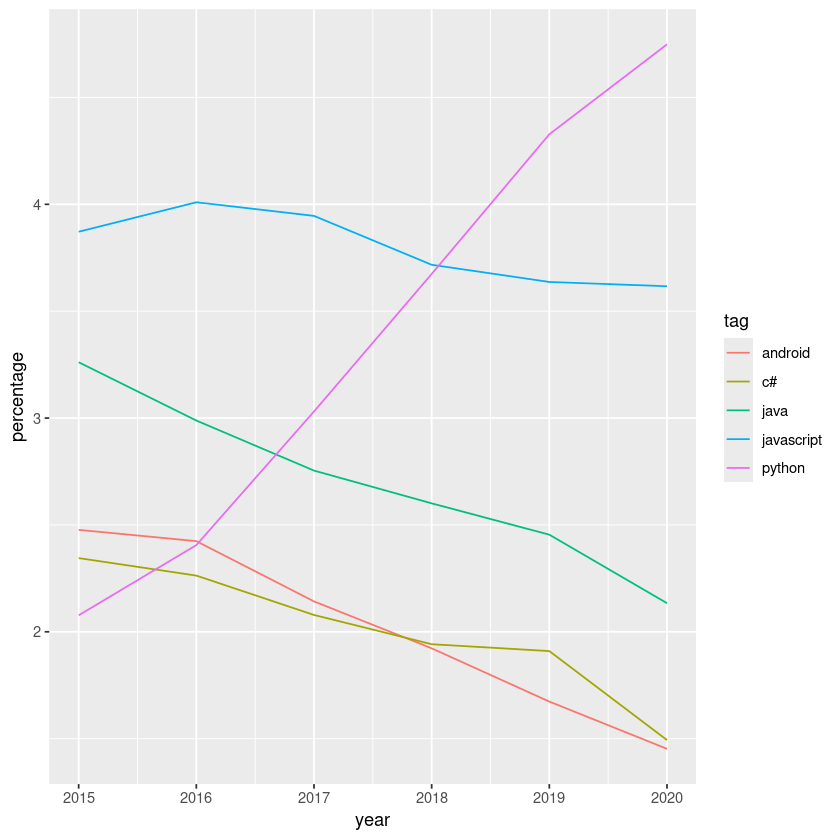

In [42]:
ggplot(data_subset, aes(x = year, y = percentage, color = tag)) + geom_line()